In [1]:
import torch
import numpy as np
from sbi_particle_physics.objects.model import Model
from sbi_particle_physics.managers.plotter import Plotter
from sbi_particle_physics.managers.backup import Backup
from sbi_particle_physics.managers.model_diagnostics import ModelDiagnostics
from sbi_particle_physics.config import MODELS_DIR, DATA_DIR

In [2]:
model = Backup.load_model_for_inference_basic(directory=MODELS_DIR / "training_15", device=torch.device("cpu"))

Model loaded from /home/hep/nrc25/sbi-particle-physics/models/training_15/epoch_844.pt


In [3]:
files = Backup.detect_files(DATA_DIR / "data_3")[-5:] # 5 last files
raw_data, raw_parameters, _ = Backup.load_data(files, model.device)
data = model.normalizer.normalize_data(raw_data[:,:model.n_points])
parameters = model.normalizer.normalize_parameters(raw_parameters[:,:model.n_points])

Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:22<00:00,  8.99it/s]


Calculating ranks for 200 SBC samples:   0%|          | 0/200 [00:00<?, ?it/s]

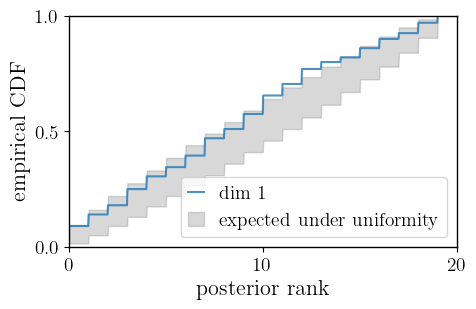

In [4]:
ModelDiagnostics.simulation_based_calibration(model, data[:200], parameters[:200], num_posterior_samples=1000)

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:10<00:00, 18.58it/s]


Calculating ranks for 200 SBC samples:   0%|          | 0/200 [00:00<?, ?it/s]

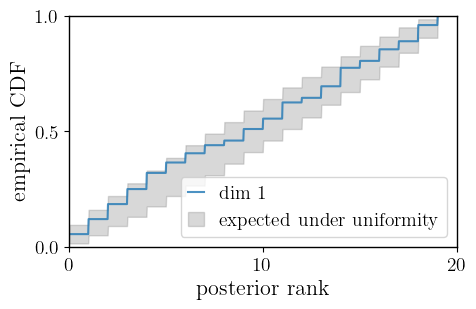

In [5]:
ModelDiagnostics.expected_coverage_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:11<00:00, 18.10it/s]


-0.7759993076324463 Should be close to 0
0.8234535171851342 Should be larger than 0.05


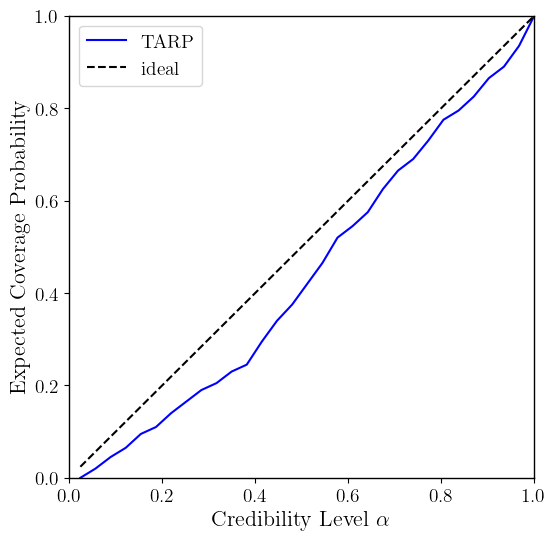

In [6]:
ModelDiagnostics.tarp_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

 Training neural network. Epochs trained: 256p-value: 0.9355, Reject H0 (misspecified): False


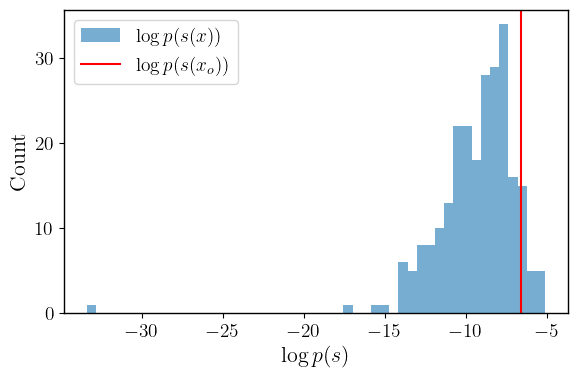

In [7]:
ModelDiagnostics.misspecification_test(model, data[-1002:-2], x_o=data[-1])

MMD p-value: 0.14900000000000002


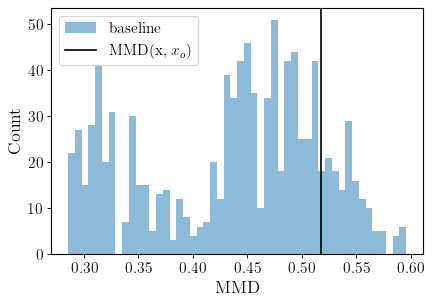

In [8]:
ModelDiagnostics.misspecification_test_mmd(model, data[-1002:-2], x_o=data[-1])
# only needs to be between 0.2->0.8 (model is wrong if <0.05)

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/eos/signal_pdf.py:71: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  log_proposal = pypmc.density.gauss.LocalGauss(sigma)


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

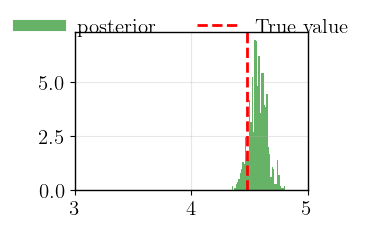

In [4]:
ModelDiagnostics.many_posteriors(model, parameter_component_index=0, x_min=3, x_max=5) # component 0 of the parameters (C_9)

  0%|          | 0/2 [00:00<?, ?it/s]

A  torch.Size([2, 1])


Simulating samples:   0%|          | 0/2 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

B torch.Size([2, 4000, 5])
C torch.Size([2, 4000, 5])
xpp sjape torch.Size([2, 4000, 5])
thetapp shape torch.Size([2, 1])


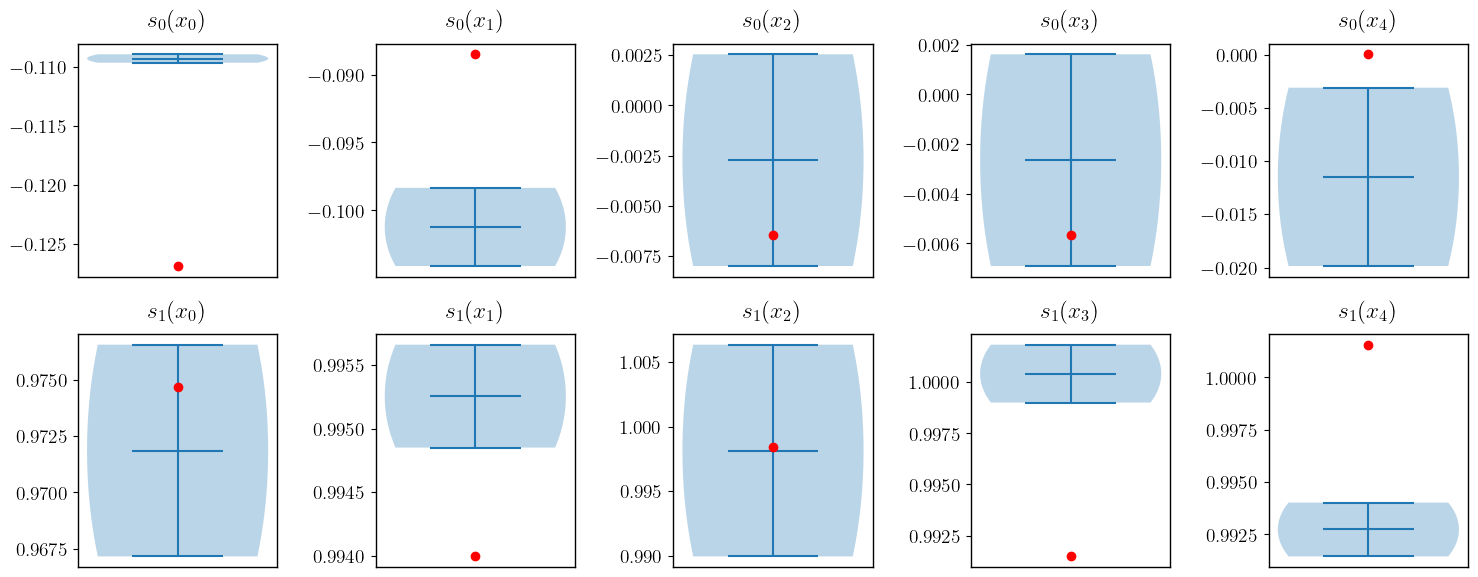

In [5]:
ModelDiagnostics.posterior_predictive_checks(model, x_o=data[-1], n_samples=2, n_points=model.n_points)

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

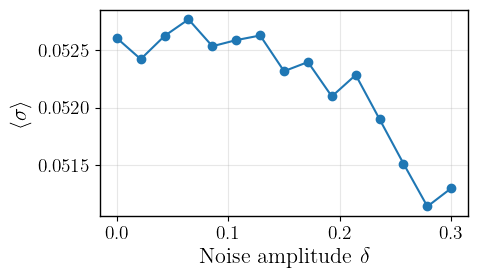

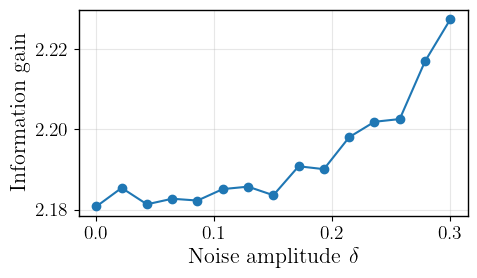

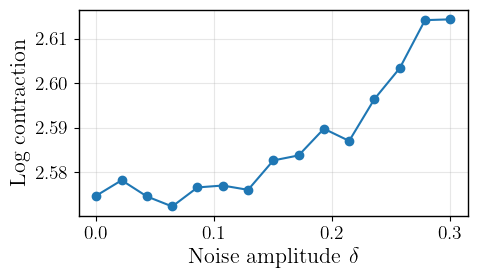

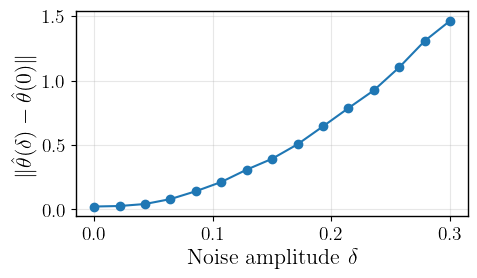

=== Robustness to noise summary ===
δ=0.00 | width=5.260e-02 | IG=2.181 | logC=2.575 | drift=2.295e-02
δ=0.02 | width=5.242e-02 | IG=2.185 | logC=2.578 | drift=2.694e-02
δ=0.04 | width=5.262e-02 | IG=2.181 | logC=2.575 | drift=4.250e-02
δ=0.06 | width=5.277e-02 | IG=2.183 | logC=2.572 | drift=8.056e-02
δ=0.09 | width=5.253e-02 | IG=2.182 | logC=2.577 | drift=1.417e-01
δ=0.11 | width=5.259e-02 | IG=2.185 | logC=2.577 | drift=2.132e-01
δ=0.13 | width=5.263e-02 | IG=2.186 | logC=2.576 | drift=3.091e-01
δ=0.15 | width=5.232e-02 | IG=2.184 | logC=2.583 | drift=3.934e-01
δ=0.17 | width=5.240e-02 | IG=2.191 | logC=2.584 | drift=5.058e-01
δ=0.19 | width=5.210e-02 | IG=2.190 | logC=2.590 | drift=6.449e-01
δ=0.21 | width=5.228e-02 | IG=2.198 | logC=2.587 | drift=7.866e-01
δ=0.24 | width=5.190e-02 | IG=2.202 | logC=2.596 | drift=9.244e-01
δ=0.26 | width=5.151e-02 | IG=2.203 | logC=2.603 | drift=1.103e+00
δ=0.28 | width=5.114e-02 | IG=2.217 | logC=2.614 | drift=1.308e+00
δ=0.30 | width=5.130e-02 |

In [ ]:
n_posterior_samples = 1000
deltas = np.linspace(0.0, 0.3, 15).tolist()
ModelDiagnostics.robustness_to_noise(model, x_o_raw=raw_data[-100:], n_posterior_samples=n_posterior_samples, deltas=deltas)

/home/hep/nrc25/sbi-particle-physics/src/sbi_particle_physics/objects/model.py:192: UserWarning: Capping max_sampling_batch_size from 10000 to 1000 to avoid excessive memory usage.
  return self.posterior.sample_batched((n_parameters,), x=observed_samples).transpose(0,1) # sbi gives it in a weird order


Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

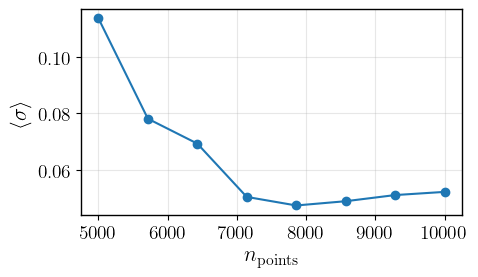

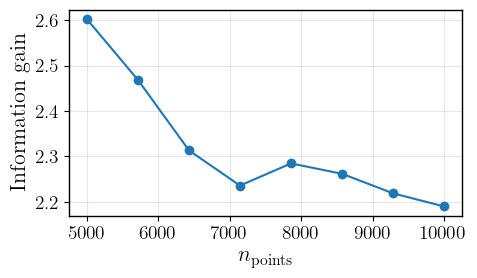

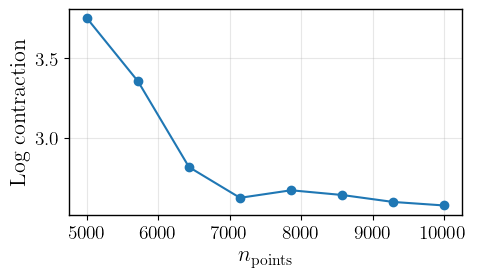

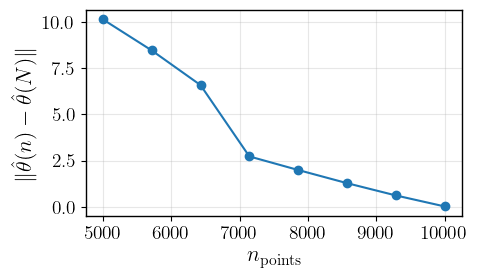

=== Robustness to n_points summary ===
n=10000 | width=5.222e-02 | IG=2.190 | logC=2.574 | drift=2.612e-02
n=9285 | width=5.110e-02 | IG=2.219 | logC=2.596 | drift=6.217e-01
n=8571 | width=4.892e-02 | IG=2.262 | logC=2.640 | drift=1.286e+00
n=7857 | width=4.742e-02 | IG=2.285 | logC=2.669 | drift=1.997e+00
n=7142 | width=5.045e-02 | IG=2.236 | logC=2.622 | drift=2.732e+00
n=6428 | width=6.930e-02 | IG=2.313 | logC=2.815 | drift=6.589e+00
n=5714 | width=7.811e-02 | IG=2.468 | logC=3.353 | drift=8.466e+00
n=5000 | width=1.136e-01 | IG=2.602 | logC=3.749 | drift=1.014e+01


In [ ]:
n_posterior_samples = 1000
ModelDiagnostics.robustness_to_npoints(model, x_o_raw=raw_data[-100:], n_posterior_samples=n_posterior_samples, use_random_subsample=False, number_of_ns=20)